In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance

In [2]:
df = pd.read_csv("bike_rent_prediction.csv")  
print(df.head())

   index        Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0      0  01/12/2017                254     0            -5.2           37   
1      1  01/12/2017                204     1            -5.5           38   
2      2  01/12/2017                173     2            -6.0           39   
3      3  01/12/2017                107     3            -6.2           40   
4      4  01/12/2017                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0         

In [3]:
print(df.info())
# Show basic info about columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     100 non-null    int64  
 1   Date                      100 non-null    object 
 2   Rented Bike Count         100 non-null    int64  
 3   Hour                      100 non-null    int64  
 4   Temperature(C)            100 non-null    float64
 5   Humidity(%)               100 non-null    int64  
 6   Wind speed (m/s)          100 non-null    float64
 7   Visibility (10m)          100 non-null    int64  
 8   Dew point temperature(C)  100 non-null    float64
 9   Solar Radiation (MJ/m2)   100 non-null    float64
 10  Rainfall(mm)              100 non-null    float64
 11  Snowfall (cm)             100 non-null    int64  
 12  Seasons                   100 non-null    object 
 13  Holiday                   100 non-null    object 
 14  Functioning

In [4]:
print(df.isnull().sum())
# Check for missing values

index                       0
Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64


In [5]:
print(df.describe())
# Get summary statistics

            index  Rented Bike Count        Hour  Temperature(C)  Humidity(%)  \
count  100.000000         100.000000  100.000000      100.000000   100.000000   
mean    49.500000         346.130000   11.100000        0.563000    59.680000   
std     29.011492         197.856629    7.098869        4.383248    22.769766   
min      0.000000          13.000000    0.000000       -7.600000    21.000000   
25%     24.750000         199.500000    5.000000       -3.050000    38.750000   
50%     49.500000         351.500000   11.000000        0.700000    57.500000   
75%     74.250000         460.750000   17.000000        4.125000    82.000000   
max     99.000000         937.000000   23.000000        8.000000    92.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
count        100.000000        100.000000                100.000000   
mean           2.094000       1318.500000                 -7.261000   
std            1.163921        704.705576                

In [6]:
df.drop(columns=["index", "Snowfall (cm)", "Seasons", "Holiday", "Functioning Day"], inplace=True)


In [7]:
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,346.130000,11.100000,0.563000,59.680000,2.094000,1318.500000,-7.261000,0.221000,0.041000
std,197.856629,7.098869,4.383248,22.769766,1.163921,704.705576,7.990106,0.374512,0.272324
min,13.000000,0.000000,-7.600000,21.000000,0.500000,129.000000,-22.400000,0.000000,0.000000
25%,199.500000,5.000000,-3.050000,38.750000,1.375000,472.000000,-15.650000,0.000000,0.000000
50%,351.500000,11.000000,0.700000,57.500000,1.700000,1467.500000,-5.350000,0.000000,0.000000
75%,460.750000,17.000000,4.125000,82.000000,2.500000,2000.000000,-0.400000,0.242500,0.000000
max,937.000000,23.000000,8.000000,92.000000,5.800000,2000.000000,3.800000,1.170000,2.500000


In [8]:
# as the data is clean so far some values are null but not completely so we will be keeping them, cause any signal can make difference

### Data Visualization

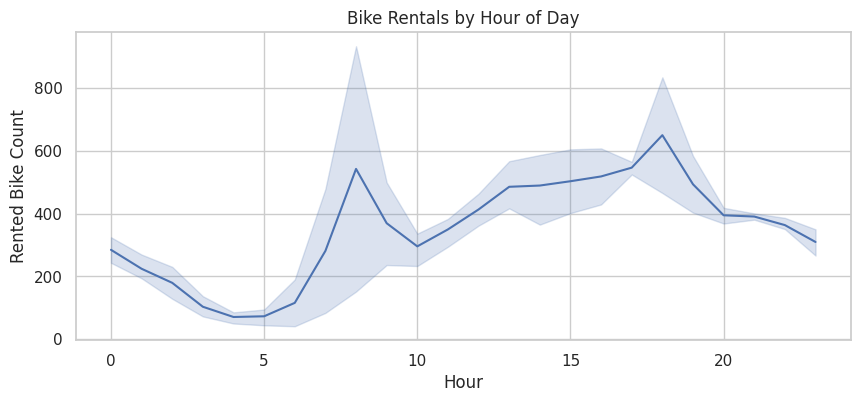

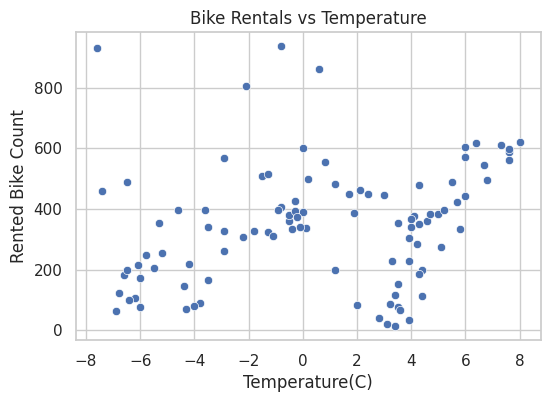

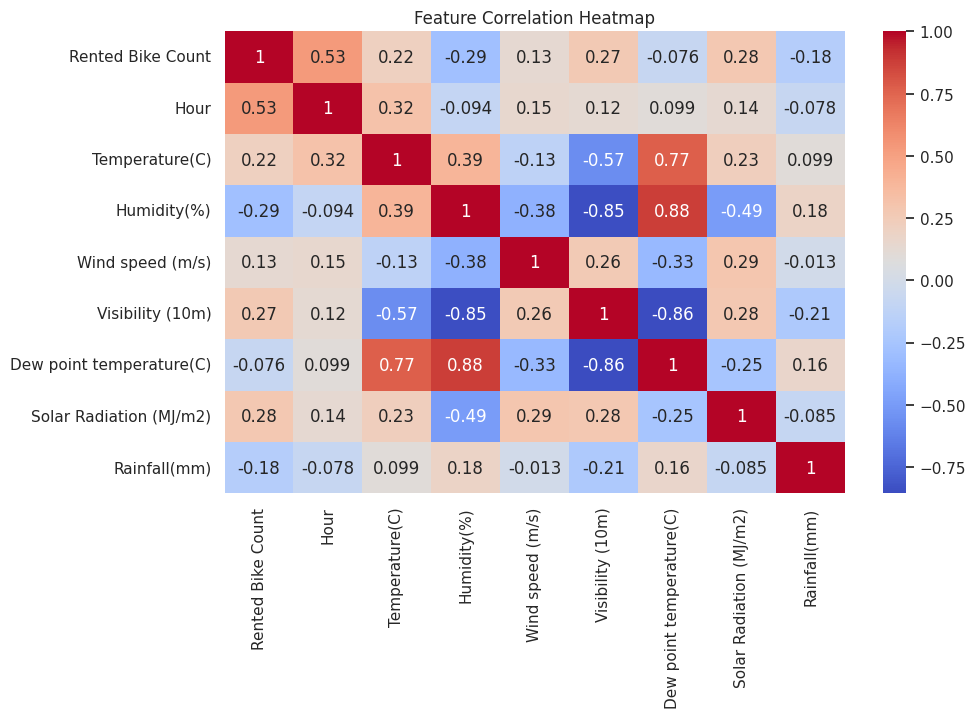

In [12]:
# Set seaborn style
sns.set(style="whitegrid")

# Bike count vs hour
plt.figure(figsize=(10, 4))
sns.lineplot(x="Hour", y="Rented Bike Count", data=df)
plt.title("Bike Rentals by Hour of Day")
plt.show()

# Bike count vs temperature
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Temperature(C)", y="Rented Bike Count", data=df)
plt.title("Bike Rentals vs Temperature")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [14]:
# how to understadn correlation heatmap

# Look at the color of each cell to see the strength and direction of the correlation.
# Darker colors indicate stronger correlations, while lighter colors indicate weaker correlations.
# Positive correlations (when one variable increases, the other variable tends to increase) are usually represented by warm colors, such as red or orange.
# Negative correlations (when one variable increases, the other variable tends to decrease) are usually represented by cool colors, such as blue or green.

# data splitting and model training

In [18]:
# Step 1: Define features and target
X = df[['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 
        'Visibility (10m)', 'Dew point temperature(C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)']]

y = df['Rented Bike Count']


In [19]:
# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Create the model
model = LinearRegression()

In [24]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predicting on the test set
y_pred = model.predict(X_test)


In [26]:
y_pred

array([404.90875445, 285.25833411, 384.8534432 , 527.84435416,
       535.58447419, 562.72569527, 398.08041326, 248.94152638,
       361.79565969, 222.79178207, 457.0925467 , 174.18506903,
       200.46083968, 306.24028179, 400.29083193, 252.82263052,
       182.81105211, 193.08235388, 455.19765725, 186.33773366])

In [28]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 141.81
Mean Squared Error (MSE): 50057.40
R² Score: 0.28


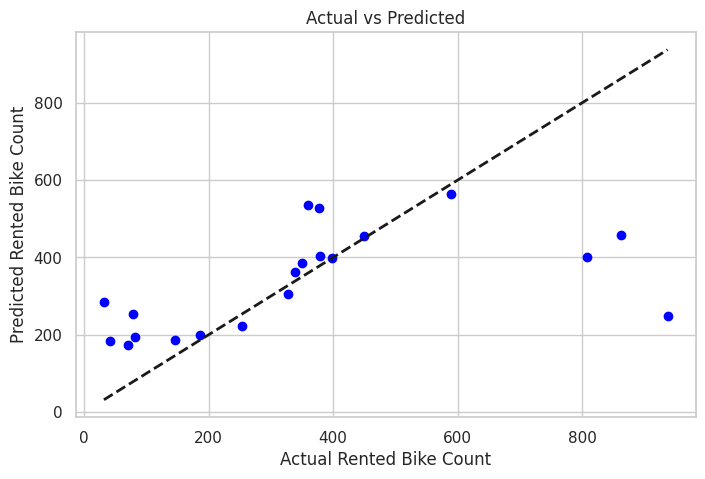

In [29]:

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Rented Bike Count")
plt.ylabel("Predicted Rented Bike Count")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

# Random forest regressor

In [31]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [32]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
rf_predictions = rf_model.predict(X_test)

In [34]:
rf_predictions

array([375.54, 102.04, 294.21, 402.1 , 425.6 , 599.32, 370.5 , 416.07,
       389.25, 206.39, 533.62, 122.94, 262.13, 410.81, 505.92, 122.8 ,
        72.88,  96.86, 415.06, 239.68])

In [35]:
# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R²: {rf_r2:.2f}")

Random Forest MAE: 96.91
Random Forest MSE: 25861.44
Random Forest R²: 0.63


In [36]:
# Create a feature importance plot
importances = rf_model.feature_importances_
features = X_train.columns
indices = importances.argsort()[::-1]

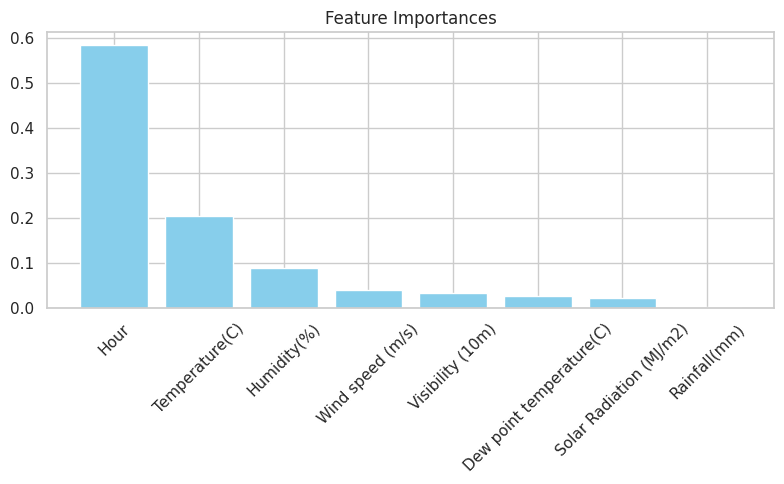

In [37]:
plt.figure(figsize=(8, 5))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=45)
plt.tight_layout()
plt.show()

# using the gradient boosting algorithm (Xgboost)

In [39]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [40]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [41]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

In [42]:
y_pred_xgb

array([356.4941  ,  87.6806  , 314.01962 , 404.5173  , 402.73605 ,
       569.23206 , 338.53607 , 391.2452  , 361.68634 , 241.58711 ,
       561.1523  , 131.89363 , 209.58804 , 386.7904  , 556.55493 ,
       102.73918 ,  12.370139,  64.559586, 447.79388 , 309.27286 ],
      dtype=float32)

In [43]:
# Evaluate
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost MAE:", round(mae_xgb, 2))
print("XGBoost MSE:", round(mse_xgb, 2))
print("XGBoost R²:", round(r2_xgb, 2))

XGBoost MAE: 88.82
XGBoost MSE: 24974.31
XGBoost R²: 0.64


<Figure size 1000x600 with 0 Axes>

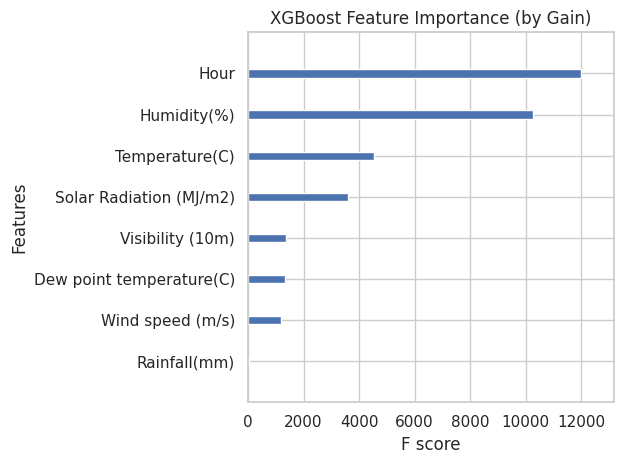

In [44]:
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='gain', show_values=False)
plt.title("XGBoost Feature Importance (by Gain)")
plt.grid(True)
plt.tight_layout()
plt.show()

# hyperparameter tuning with xgboost

In [47]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

In [48]:
xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}


In [49]:
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)

print("Tuned XGBoost MAE:", mean_absolute_error(y_test, y_pred_best))
print("Tuned XGBoost MSE:", mean_squared_error(y_test, y_pred_best))
print("Tuned XGBoost R²:", r2_score(y_test, y_pred_best))


Tuned XGBoost MAE: 75.97160339355469
Tuned XGBoost MSE: 17466.734375
Tuned XGBoost R²: 0.7478431463241577


In [51]:
# cross validation (cv)
# Split data into portions.
# Train our model on a subset of the portions.
# Test our model on the remaining subsets of the data.
# Repeat steps 2-3 until the model has been trained and tested on the entire dataset.
# Average the model performance across all iterations of testing to get the total model performance.

<Figure size 1000x600 with 0 Axes>

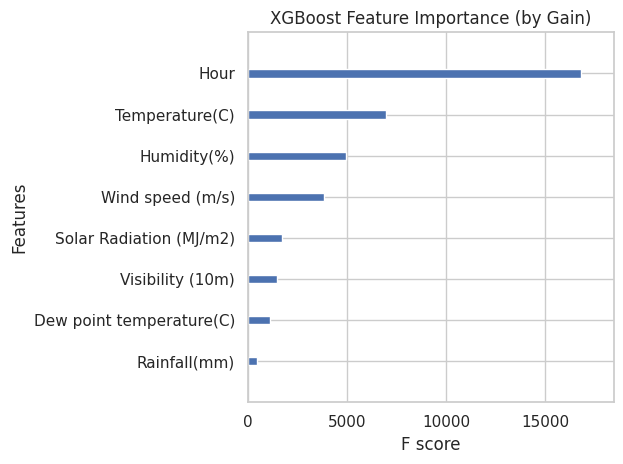

In [54]:
plt.figure(figsize=(10, 6))
plot_importance(best_xgb, importance_type='gain', show_values=False)
plt.title("XGBoost Feature Importance (by Gain)")
plt.grid(True)
plt.tight_layout()
plt.show()